In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.linalg import qr
from scipy.linalg import eigh

# PCA and Eigendecomposition

## Steps

1. Generate bi-variate normal random numbers
2. Perform PCA on the bi-variate normal random numbers
3. Perform PCA step-by-step
4. Perform eigendecomposition step-by-step

## Generate bi-variate normal random numbers

Generate random numbers from the same multivariate normal distribution. Define $\mu$ and $\mathit{Cov}$, and generate $100$ random numbers.

Covariances of multivariate normal distributions, specified as a $d$-by-$d$ (here $d=2$) symmetric, positive semi-definite matrix $\mathit{Cov}$, the covariance matrix. The covariance matrix is diagonal, containing variances along the diagonal and the covariance off it.

In [2]:
# format compact % For compact printing of results
mu = np.array([2, 3])
Cov = np.array([[2, 1.5], [1.5, 4]])

#rng('default')  % For reproducibility
random_generator = np.random.default_rng(40)

#R = mvnrnd(mu,Cov,100);
R = random_generator.multivariate_normal(mu, Cov, 100)

Plot the random numbers.

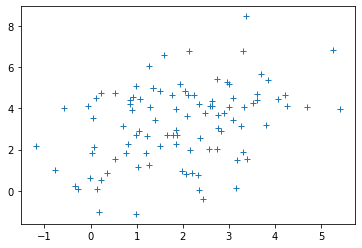

In [3]:
#plot(R(:,1),R(:,2),'+');

# style 1
plt.plot(R[:,0], R[:,1], '+')
plt.show()

# style 2
#plt.plot(R[:,0], R[:,1], '+')
#plt.axis('equal')
#plt.show()


Check sample variance and covariance of the generated data points and the sample correlation between the variables.

In [4]:
Sample_cov = np.cov(R, rowvar=False)
Cor = np.corrcoef(R, rowvar=False)
print("Sample_cov\n",Sample_cov)
print("Cor\n",Cor)

Sample_cov
 [[1.85844506 0.93639797]
 [0.93639797 3.53424234]]
Cor
 [[1.         0.36537383]
 [0.36537383 1.        ]]


Covariance and variance: 
$$\mathit{Cov}(X,Y)=\frac{1}{n}\sum_{i=1}^n((x_i-\mu_X)(y_i-\mu_Y))$$
$$\mathit{Var}(X)=\mathit{Cov}(X,X)=\sigma_X^2$$ 

Pearson's coefficient of correlation $$\mathit{Cor}(X, Y)=\frac{\mathit{Cov}(X, Y)}{\sigma_X \sigma_Y}=\frac{\mathit{Cov}(X, Y)}{\sqrt{\mathit{Var}(X)} \sqrt{\mathit{Var}(Y)}}$$ 

In our example $\mathit{Cov}(X, Y)=2.1031$, $\mathit{Var}(X)=1.3512$, and $\mathit{Var}(Y)=4.0267$. As expected:

In [5]:
# The r=correlation of two variables equals numerator=the 
# covariance of them dividided by the, denom= sqrt of the 
# variance of one times the sqrt of the variance of the other

r = Sample_cov[0,1]/(np.sqrt(Sample_cov[0,0])*np.sqrt(Sample_cov[1,1]))
print(r)
# print(r==Cor[0,1])

0.3653738276439561


## Perform PCA on the bi-variate normal random numbers

In [6]:
#[loading_vector,score,latent,tsquared,variablity_explained,mu] = pca(R); 

pcamodel = PCA(n_components=2)
pca = pcamodel.fit_transform(R)
print("\ncomponents (loading vector):",pcamodel.components_,
      "\nexplained variance", pcamodel.explained_variance_, 
      "\nexplained_variance_ratio_",pcamodel.explained_variance_ratio_,"\n")



components (loading vector): [[ 0.40815113  0.91291437]
 [ 0.91291437 -0.40815113]] 
explained variance [3.95289266 1.43979474] 
explained_variance_ratio_ [0.73300979 0.26699021] 



Check the correlation of the scores. As expected:

In [7]:
np.corrcoef(pca, rowvar=False)

array([[ 1.00000000e+00, -3.06988729e-16],
       [-3.06988729e-16,  1.00000000e+00]])

The eigenvectors are unit vectors and orthogonal, therefore the $2$-Norm is $1$ and the inner (scalar, dot) product is 0.

In [8]:
print(np.linalg.norm(pcamodel.components_[0,:]))
print(np.linalg.norm(pcamodel.components_[1,:]))
print(pcamodel.components_[0,:]@pcamodel.components_[1,:])

1.0
1.0
0.0


Produce a biplot of the scores and loading vectors of the two principle components.

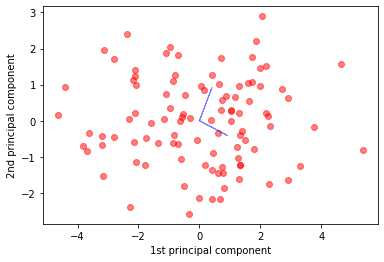

In [9]:
plt.scatter(pca[:, 0], pca[:, 1], c='r', alpha=0.5,)
plt.arrow(0, 0, pcamodel.components_[0,0], pcamodel.components_[0,1], color='b', alpha=.5)
plt.arrow(0, 0, pcamodel.components_[1,0], pcamodel.components_[1,1], color='b', alpha=.5)
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.show()




## Perform PCA step-by-step

1. Center and Standardize, i.e., subtracting the mean of the data from the original dataset
2. Find the covariance matrix of the dataset
3. Find the eigenvectors associated with the greatest eigenvalues of the covariance matrix
4. Project the original dataset on the eigenvectors

### Standardize

Compute standard scores (commonly called $z$-scores) defined as $z_i=\frac{x_i-\mu_X}{\sigma_X}$.

In [10]:
# equivalent to below
standardized_data = (R-np.mean(R,axis=0)) / np.std(R,axis=0,ddof=0) # must specify ddof here
# print("\ncov std,",np.cov(data, rowvar=False)) # can also add as an attibute here, need to match!

# standardized_data = (R-np.mean(R,axis=0)) / np.array( [np.sqrt(Sample_cov[0,0]), np.sqrt(Sample_cov[1,1])])
# print("\ncov sqrt,",np.cov(data, rowvar=False, ddof=1)) # ddof=1 is the default so it can be omitted

#from sklearn.preprocessing import StandardScaler
#standardized_data = StandardScaler().fit_transform(R)
#print("\ncov using scaler,", np.cov(standardized_data,rowvar=False,ddof=0))


### Find the covariance matrix 

As before. Check out the effect of standardization on the covariance matrix.

In [11]:
Cov = np.cov(standardized_data,rowvar=False, ddof=0)
print(Cov)

[[1.         0.36537383]
 [0.36537383 1.        ]]


### Find the eigenvectors and eigenvalues 

Recall the definition of eigenvectors $v$ and -values $\lambda$: $A v = \lambda v$, where $A$ is an $n$-by-$n$ matrix, $v$ is a column vector of length $n$, and $\lambda$ is a scalar.

In [12]:
values, vectors = eigh(Cov)  # Note that since spicy v1.5.0, use 'subset_by_index' instead of 'eigvals'
print("vectors\n",vectors)
print("values\n",values)

vectors
 [[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
values
 [0.63462617 1.36537383]


Mind that the second eigenvalue of $1.6253$ is larger than the first eigenvalue of $0.3747$.

Lets check if $\mathit{Cov}\ v=\lambda v$ for the two eigenvectors and -values. As expected:

In [13]:
print( Cov@vectors[:,0] - values[0]*vectors[:,0])
print( Cov@vectors[:,1] - values[1]*vectors[:,1])

[ 5.55111512e-17 -5.55111512e-17]
[1.11022302e-16 1.11022302e-16]


The eigenvectors returned are unit vectors and orthogonal, therefore the $2$-Norm is $1$ and the inner (scalar, dot) product is 0.

In [14]:
print(np.linalg.norm(vectors[:,0]))
print(np.linalg.norm(vectors[:,1]))
print( vectors[:,0]@vectors[:,1])
print(vectors)

1.0
1.0
0.0
[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


### Project the original dataset on the eigenvectors

Compute the scores of the data points corresponding to the two principle components. Since the second eigenvalue of $2.6326$ is larger than the first eigenvalue of $0.5448$, we need to flip the scores left/right since the second column is first principle component (the one with the largest eigenvalue).

In `Matlab`, the operation `A'` computes the transpose $A^T$ of a matrix $A$.

In [66]:
score = vectors@ standardized_data.T;
score = score.T;
score = np.fliplr(score);
vectors = np.fliplr(vectors);

Check the correlation of the scores. As expected:

In [67]:
np.corrcoef(score,rowvar=False)

array([[ 1.00000000e+00, -9.09819961e-17],
       [-9.09819961e-17,  1.00000000e+00]])

Produce a biplot of the scores and loading vectors of the two principle components.

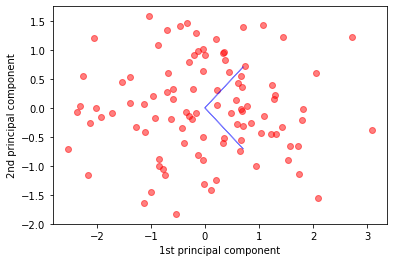

In [68]:
# biplot(loading_vector,'scores',score,'varlabels',{'X','Y'});
plt.scatter(score[:, 0], score[:, 1], c='r', alpha=0.5,)
plt.arrow(0, 0, vectors[0,0], vectors[0,1], color='b', alpha=.5)
plt.arrow(0, 0, vectors[1,0], vectors[1,1], color='b', alpha=.5)
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.show()




The eigenvalues of the covariance matrix indicate the variance in this (new) coordinate direction. We can use this information to calculate the relative variance explained by each component: for each component, we divide the variances according to the eigenvectors by the sum of the variances. In our example, the 1st and 2nd principal component contains $81.26$ and $16.53$ percent of the total variance in data.

In [18]:
variance = np.var(score,axis=0)
print(variance)
print(variance/np.sum(variance))

[1.36537383 0.63462617]
[0.68268691 0.31731309]


*Why does this look differently compared to the plot when using the `pca` library? Fix the problem!*

In [19]:
#[loading_vector,score,latent,tsquared,variablity_explained,mu] = pca(data); 
pca2 = PCA()
data2 = pca2.fit_transform(standardized_data)
#biplot(loading_vector,'scores',score,'varlabels',{'X','Y'});

In [20]:
print(pcamodel.components_)

[[ 0.40815113  0.91291437]
 [ 0.91291437 -0.40815113]]


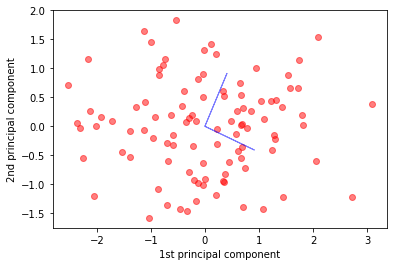

In [21]:
# biplot(loading_vector,'scores',score,'varlabels',{'X','Y'});
plt.scatter(data2[:, 0], data2[:, 1], c='r', alpha=0.5,)
plt.arrow(0, 0, pcamodel.components_[0,0], pcamodel.components_[1,0], color='b', alpha=.5)
plt.arrow(0, 0, pcamodel.components_[0,1], pcamodel.components_[1,1], color='b', alpha=.5)
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')
plt.show()




## Perform eigendecomposition step-by-step

### Eigenvalues

We find the eigenvalues of an $n\times n$ (covariance) matrix $C$ by solving the so-called characteristic equation
$\det(C – \lambda I) = 0$ where $I$ is the identity matrix of size $n$.

Here $C=\mathit{Cov}$ is a $2\times 2$ matrix and the determinant of such a matrix is defiend as $\det(C)=c_{11}c_{22}-c_{12}c_{21}$. Hence, we need to solve:

\begin{align}
\det(\mathit{Cov} – \lambda I) &=(\mathit{Cov}_{11}-\lambda)(\mathit{Cov}_{22}-\lambda)-\mathit{Cov}_{12}\mathit{Cov}_{21}\\
    &=\lambda^2 -(\mathit{Cov}_{11}+\mathit{Cov}_{22})\lambda +\mathit{Cov}_{11}\mathit{Cov}_{22} -\mathit{Cov}_{12}\mathit{Cov}_{21}\\
    &=0
\end{align}

It's a quadriatic equation in $\lambda$ with, in general, two solutions.

In [22]:
print(Cov)
a = 1;
b = -Cov[0,0]-Cov[1,1];
c = Cov[0,0]*Cov[1,1]-Cov[0,1]*Cov[1,0];

polynomial = np.array([a, b, c]);
eigenvalues = np.roots(polynomial)

print(eigenvalues)


[[1.         0.36537383]
 [0.36537383 1.        ]]
[1.36537383 0.63462617]


Let's test the two solutions $\lambda_1$ and $\lambda_2$. As expected:

In [23]:
lambda1 = np.diag(np.array([eigenvalues[0], eigenvalues[0]]))
Char1 = Cov - lambda1;
print(np.linalg.det(Char1))
lambda2 = np.diag(np.array([eigenvalues[1], eigenvalues[1]]));
Char2 = Cov - lambda2;
print(np.linalg.det(Char2))

print(lambda1)
print(lambda2)

-2.4338786162744533e-16
-8.112928720914864e-17
[[1.36537383 0.        ]
 [0.         1.36537383]]
[[0.63462617 0.        ]
 [0.         0.63462617]]


BTW, in `Matlab` we can write the shortcut using the characteristic polynomial `poly` of a matrix :

In [24]:
eigenvalues2 = np.roots(np.poly(Cov))
print(eigenvalues2)

[1.36537383 0.63462617]


### Eigenvectors

All that's left is to find the two eigenvectors $v_1, v_2$. We understand that by definition:

\begin{align}
Cv&=\lambda v\\
Cv-\lambda v&=0\\
Cv-\lambda I v&=0\\
(C-\lambda I) v&=0\\
\end{align}

This is nothing but solving a linear equation system.

Before, we compute the eigenvector $v_1$ associated with the eigenvalue $\lambda_1=1.6253$, we first, check if a solution exits. Therfore, we comput the rank, the determinat, and the reduced row echelon form of the matrix $A_1=C – \lambda_1 I$.

In `Matlab` the function `rref` computes the [reduced row echelon form](https://en.wikipedia.org/wiki/Row_echelon_form) of a matrix resulting from a [Gaussian elimination](https://en.wikipedia.org/wiki/Gaussian_elimination).

In [69]:
A1 = Cov - lambda1
A1_rank = np.linalg.matrix_rank(A1)
A1_det = np.linalg.det(A1)
(_, rref) = qr(A1) # perform QR decomposition, R is RREF
A1_red = rref


As we see, we have a *general* problem: the matrix $A_1$ is not fully ranked, hence, the linear equation system is underdetermined, i.e. we have infinitly many solution. Consequently, its deteminat is 0 and $A_1$ is, hence, not invertible.

However, the length and the orientation of an eigenvector $v$ are arbitrary. So we can set the last entry to anything, say $v_1(2) =1$, compute $v_1(1)$, and then fix the length of $v$ to get a unit vector. 

Let $𝐴_1$ be in reduced row echelon form, i.e. $A_1(i,i)=1$, and $v_1(2) =1$. The linear equation reduces to

\begin{align}
A_1(1,1)v_1(1) + A_1(1,2)v_1(2) & = 0\\
1v_1(1) + A_1(1,2)1 & = 0\\
v_1(1) + A_1(1,2) & = 0\\
v_1(1) & = - A_1(1,2) \\
\end{align}

To make it a unit length vector, we divide by the length ($2$-norm) of the vector.

In [71]:
v1 = np.array([-A1_red[0,1],1])
eigenvector1 = v1/np.linalg.norm(v1)
print(eigenvector1)


[0.45905508 0.88840781]


Finally, we are ready to compute the eigenvector $v_2$ associated with the eigenvalue $\lambda_2=0.3747$ in the same way.

In [72]:
A2 = Cov - lambda2
(_, rref2) = qr(A2) # perform QR decomposition, R is RREF
A2_red = rref2
v2 = [-A2_red[0,1],1];
eigenvector2 = v2/np.linalg.norm(v2)
print(eigenvector2)

[0.45905508 0.88840781]


## References

1. http://mres.uni-potsdam.de/index.php/2017/09/14/principal-component-analysis-in-6-steps/
2. https://www.youtube.com/watch?v=ssfMqFycXOU